# Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

## Data generation

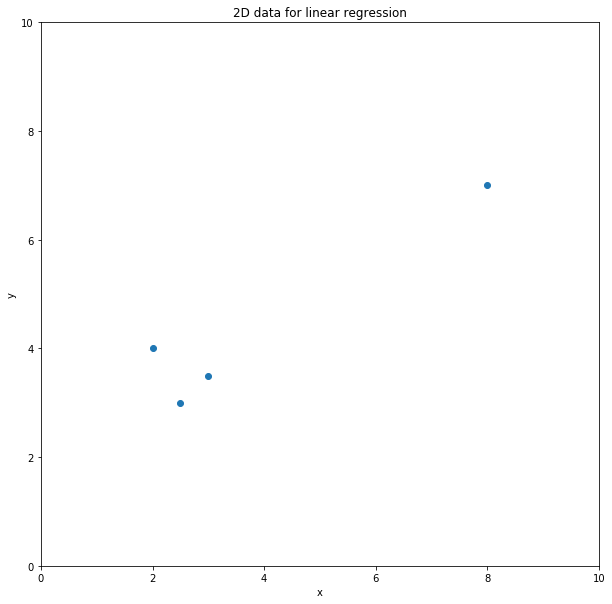

In [31]:
x = np.array([2,2.5,3,8])
y = np.array([4,3,3.5,7])

plt.figure(figsize=(10,10))
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(x,y,'o')
plt.ylabel('y')
plt.xlabel('x')
plt.title('2D data for linear regression')

# Linear regression using a quadratic model

$y = \theta_0 + \theta_1 x + \theta_2 x^2$

In [32]:
def evaluate_quadratic(x, theta):
    X = np.vstack([np.ones(len(x)), x, x**2])
    return np.dot(theta, X)

## Maximum likelihood estimate

$\theta_{ML} = (X^T X)^{-1} X^T Y$

$\sigma^2 = \frac{1}{n} (Y - X \theta)^T (Y - X \theta)$

In [38]:
X = np.vstack([np.ones(len(x)), x, x**2]).T
Y = y.T
theta_ml = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
sigma2 = np.dot(Y - np.dot(X, theta_ml).T, Y - np.dot(X, theta_ml)) / len(x)

0.0809842989624


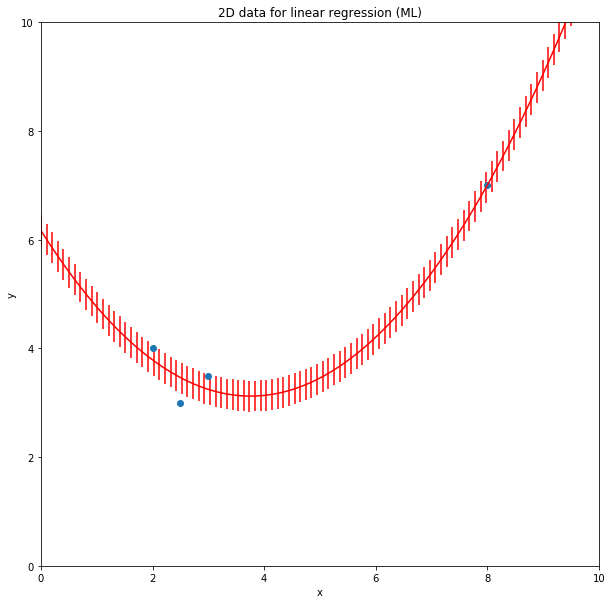

In [56]:
x_plot = np.linspace(0, 10, 100)
y_plot = evaluate_quadratic(x_plot, theta_ml)
y_error = np.ones(len(y_plot)) * (sigma2**0.5)

plt.figure(figsize=(10,10))
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(x,y,'o')
plt.errorbar(x_plot, y_plot, yerr=y_error, fmt='r-')
plt.ylabel('y')
plt.xlabel('x')
plt.title('2D data for linear regression (ML)')

## Bayesian estimate

$\theta_n = (\lambda I_d + X^T X)^{-1} X^T Y$

$V_n = \sigma^2 (\lambda I_d + X^T X)^{-1}$

In [70]:
X = np.vstack([np.ones(len(x)), x, x**2]).T
Y = y.T
tau2 = 60
l = sigma2 / tau2 # lambda 
I_d = np.identity(3)
tmp = l*I_d + np.dot(X.T, X)
tmp_inv = np.linalg.inv(tmp)
theta_n = np.dot(np.dot(tmp_inv, X.T), Y)
V_n = sigma2 * tmp_inv

print 'theta_n', theta_n
print 'V_n', V_n

theta_n [ 5.92839909 -1.49555854  0.20371843]
V_n [[ 2.03575964 -1.06734771  0.1018509 ]
 [-1.06734771  0.56918918 -0.05467388]
 [ 0.1018509  -0.05467388  0.00528413]]


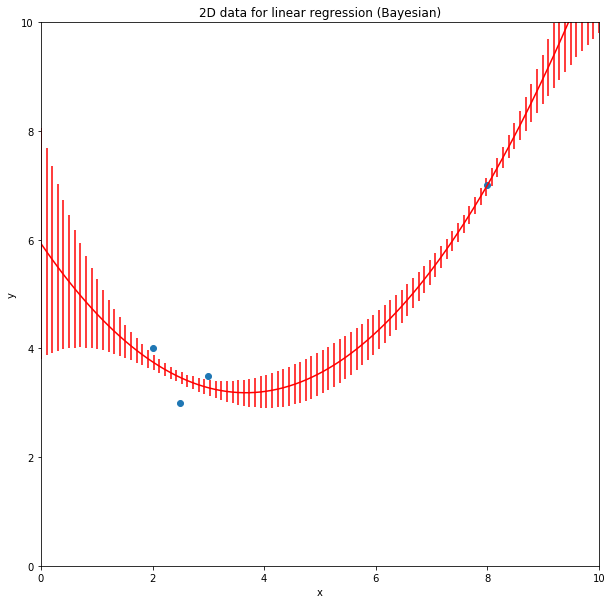

In [81]:
x_plot = np.linspace(0, 10, 100)
y_plot = evaluate_quadratic(x_plot, theta_n)

def eval_error(x, sigma2, V_n):
    X = np.vstack([np.ones(len(x)), x, x**2])
    return np.dot(np.dot(X.T, V_n), X).diagonal() 
    
y_error = np.ones(len(y_plot)) * (sigma2 + eval_error(x_plot, sigma2, V_n))

plt.figure(figsize=(10,10))
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(x,y,'o')
plt.errorbar(x_plot, y_plot, yerr=y_error, fmt='r-')
plt.ylabel('y')
plt.xlabel('x')
plt.title('2D data for linear regression (Bayesian)')